# **Analysis of Configurations**

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### **Evaluating Resolution**

In [50]:
# dirs = ['./old_tests/resolution/sparse/', './old_tests/resolution/medium/', './old_tests/resolution/noisy/']
dirs = ['./config_testing/resolution/stats/']
dfs = []
column_order = ['Video', 'Model', 'Width (px)', 'Height (px)', 'Frame Rate (fps)']

for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            if int(config_params[1]) == 1280 or int(config_params[3]) == 25:
                continue
            
            # Setting columns based on params
            df['Test Video'], df['Width (px)'], df['Height (px)'], df['Frame Rate (fps)'] = \
            config_params[0], config_params[1], config_params[2], int(config_params[3])
            
            # Add columns
            df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
            df['Resolution (1000s of px)'] = df['Resolution (px)'] / 1000
            df['Energy (1000s of J)'] = df['energy'] / 1000
            df['Energy (1000s of J) per frame'] = df['Energy (1000s of J)'] / 250

            # Reordering columns
            df = df.reindex(columns=column_order+[x for x in df.columns if x not in column_order])

            dfs.append(df)

config_data = pd.concat(dfs).reset_index(drop=True)

C:\Users\adamf\AppData\Local\Temp\ipykernel_10188\3626564008.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
C:\Users\adamf\AppData\Local\Temp\ipykernel_10188\3626564008.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
C:\Users\adamf\AppData\Local\Temp\ipykernel_10188\3626564008.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
C:\Users\adamf\AppData\Local\Temp\ipykernel_10188\3626564008.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeErr

In [51]:
dirs = ['./config_testing/framerate/stats/']#, './config_testing/resolution/stats/']
for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            
            # Process lines in stats.txt file
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            # Setting columns based on params
            df['Video'], df['Width (px)'], df['Height (px)'], df['Frame Rate (fps)'] = \
            str(config_params[0]), int(config_params[1]), int(config_params[2]), int(config_params[3])
            
            # Add columns
            df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
            df['Resolution (1000s of px)'] = df['Resolution (px)'] / 1000
            df['Energy (1000s of J)'] = df['energy'] / 1000
            df['Energy (J) per frame'] = df['energy'] / 250
        
            dfs.append(df)
config_data = pd.concat(dfs).reset_index(drop=True)

            

,Test Video,Model,Width (px),Height (px),Frame Rate (fps),frames,frames processed,runtime (inference),average time per frame,runtime (total),energy,avg power,energy per frame,mAP,Resolution (px),Resolution (1000s of px),Energy (1000s of J),Energy (1000s of J) per frame
0,large3,NaN,640,360,5,250.0,51.0,30.467067,0.121868,49.212646,223.615213,4.543857,0.894461,0.108395,230400,230.4,0.223615,0.000894
1,large3,NaN,960,540,5,250.0,51.0,59.946195,0.239785,79.316540,392.377163,4.946978,1.569509,0.154525,518400,518.4,0.392377,0.001570
2,large4,NaN,640,360,5,250.0,51.0,29.783858,0.119135,48.488762,220.041639,4.537992,0.880167,0.294913,230400,230.4,0.220042,0.000880
3,large4,NaN,960,540,5,250.0,51.0,59.251097,0.237004,85.653778,405.774964,4.737385,1.623100,0.374657,518400,518.4,0.405775,0.001623
4,large5,NaN,640,360,5,250.0,51.0,31.640899,0.126564,50.561819,230.939874,4.567476,0.923759,0.060410,230400,230.4,0.230940,0.000924
5,large5,NaN,960,540,5,250.0,51.0,59.489513,0.237958,78.991464,386.574661,4.893879,1.546299,0.178475,518400,518.4,0.386575,0.001546
6,largeslow2,NaN,640,360,5,250.0,51.0,30.392390,0.121570,49.196264,219.821046,4.468247,0.879284,0.845565,230400,230.4,0.219821,0.000879
7,largeslow2,NaN,960,540,5,250.0,51.0,60.199806,0.240799,79.839053,383.423995,4.802462,1.533696,0.675294,518400,518.4,0.383424,0.001534
8,largeslow,NaN,640,360,5,250.0,51.0,30.710509,0.122842,49.631154,227.243875,4.578654,0.908976,0.645981,230400,230.4,0.227244,0.000909
9,largeslow,NaN,960,540,5,250.0,51.0,60.078842,0.240315,79.429527,395.138026,4.974699,1.580552,0.457577,518400,518.4,0.395138,0.001581


In [71]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
config_data.to_csv("data.csv")

In [40]:
def plot_with_best_fit(df, x_name, y_name, vid_level=None):
    
    # If video level was specified, filter df to just those rows
    if vid_level in ['sparse', 'medium', 'noisy']:
        df = df[df['Test Video'] == vid_level]
    
    # Create scatter plot
    sns.regplot(x=x_name, y=y_name, data=df, scatter_kws={'s': 50}, ci=None)

    # Calculate the regression equation using numpy's polyfit function
    # coefficients = np.polyfit(df[x_name], df[y_name], deg=1)
    # slope = coefficients[0]
    # intercept = coefficients[1]

    # Add the regression equation as an annotation on the plot
    # equation = f'y = {slope:.2f}x + {intercept:.2f}'
    # plt.annotate(equation, xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

    # Add labels and title
    plt.title('Energy Usage vs Resolution')
    plt.xlabel(x_name)
    plt.ylabel('Energy (Joules)')
    
    plt.savefig('res.png', dpi=100)




In [52]:
# plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy')

### **Frame complexity**

In [42]:
import skimage.measure   
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [44]:
testdir = '../../samples/testing/videos/'
df = pd.DataFrame()

for video in os.listdir(testdir):
    cap = cv2.VideoCapture(os.path.join(testdir, video))
    frame_no = 0
    entropies = []
    print(video)
    while frame_no < 251:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_no % 5 == 0:
            entropy = skimage.measure.shannon_entropy(frame)
            entropies.append(entropy)
        frame_no += 1
    cap.release()
    df[video.split('.')[0]] = entropies

large2.mp4
large3.mp4
large4.mp4
large5.mp4
largefast.mp4
largeslow.mp4
largeslow2.mp4
medium.mp4
noisy.mp4
smallfast.mp4
smallslow.mp4
smallslow2.mp4
sparse.mp4


In [ ]:
means = df.mean()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'large3'),
  Text(1, 0, 'large4'),
  Text(2, 0, 'large5'),
  Text(3, 0, 'largeslow2'),
  Text(4, 0, 'largeslow'),
  Text(5, 0, 'medium'),
  Text(6, 0, 'noisy'),
  Text(7, 0, 'smallslow2'),
  Text(8, 0, 'sparse'),
  Text(9, 0, 'large2'),
  Text(10, 0, 'largefast'),
  Text(11, 0, 'smallfast'),
  Text(12, 0, 'smallslow')])

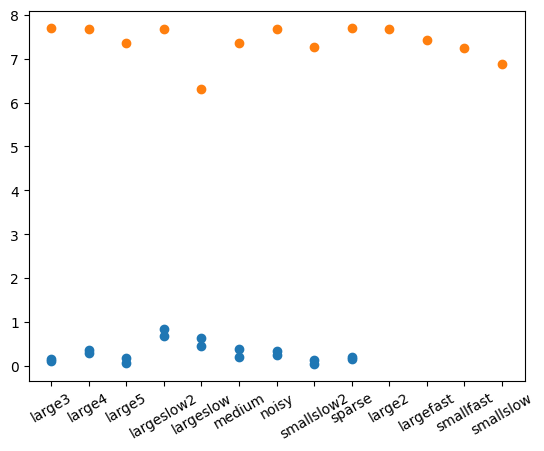

In [55]:
fig, ax = plt.subplots()

ax.scatter(config_data['Test Video'], config_data['mAP'])
ax.scatter(means.index, means)
plt.xticks(rotation=30)